In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
import h5py
import matplotlib.gridspec as gs
from utils import import_data
import seaborn as sns
# import statsmodels.api as sm
# from statsmodels.formula.api import ols

--No graphics will be displayed.


In [2]:
"""
notes: rerun all simulations and double check arrays, copy paste pictures for now into results and finish poster. 
its ok to change pictures later for now get everything on there and start writing some conclusions
    """

'\nnotes: rerun all simulations and double check arrays, copy paste pictures for now into results and finish poster. \nits ok to change pictures later for now get everything on there and start writing some conclusions\n    '

In [3]:
all_models_list = []

file_name = 'data/sim_history.hdf5'
sim_dict = import_data(file_name)
sim_dict.keys()

dict_keys(['high_rp_testing_100Hz', 'high_rp_testing_20Hz', 'lg_network_20Hz', 'lg_network_no_mf_100Hz', 'low_rp_testing_100Hz', 'low_rp_testing_20Hz', 'mid_rp_testing_100Hz', 'mid_rp_testing_20Hz', 'sm_network', 'sm_network_100Hz', 'sm_network_20Hz', 'sm_network_no_mf', 'sm_network_no_mf_100Hz', 'sm_network_no_mf_20Hz'])

In [4]:
# for key in sim_dict.keys():
#     all_models_list.append(key)

all_models_list = ['high_rp_testing_20Hz', 'mid_rp_testing_20Hz', 'low_rp_testing_20Hz', 
                   'low_rp_testing_100Hz', 'mid_rp_testing_100Hz', 'high_rp_testing_100Hz']
    
release_probs = [0.1, 0.5, 0.9]

slow_freq_model_list = ['low_rp_testing_20Hz', 'mid_rp_testing_20Hz', 'high_rp_testing_20Hz'] 

fast_freq_model_list = ['low_rp_testing_100Hz', 'mid_rp_testing_100Hz', 'high_rp_testing_100Hz']

In [5]:
# sim_dict['low_rp_testing_20Hz']['data']['golgi_input_resis_array'][:]

In [6]:
"""
    Box and whisker: boxplot(only one argument)
    Line: plot(x, y)
    bar: bar(x, y, width, align)
    heatmap: heatmap(x array of values, y array of values )
"""

'\n    Box and whisker: boxplot(only one argument)\n    Line: plot(x, y)\n    bar: bar(x, y, width, align)\n    heatmap: heatmap(x array of values, y array of values )\n'

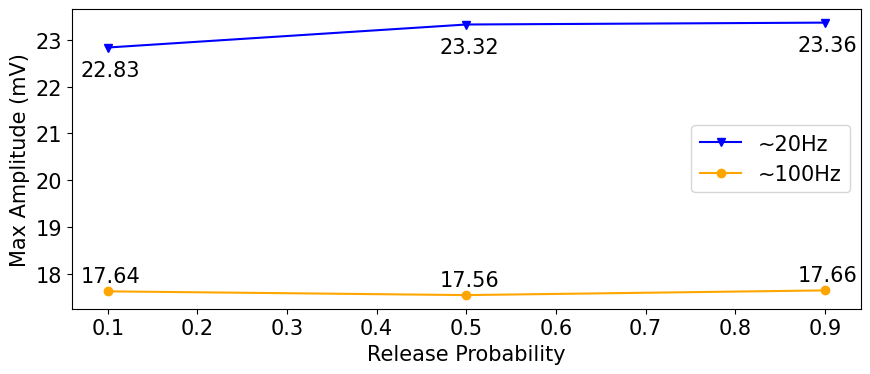

<Figure size 640x480 with 0 Axes>

In [7]:
# plot max amplitude for golgi cells 

plt.rcParams.update({'font.size': 15})
fig, axes = plt.subplots(1, 1, figsize = (9, 4))

avg_20Hz_golgi_vm = []
avg_100Hz_golgi_vm = []

for model in slow_freq_model_list:
    avg_20Hz_golgi_vm.append(np.mean(sim_dict[model]['data']['max_golgi_v_array'][:]))
    
for model in fast_freq_model_list:
    avg_100Hz_golgi_vm.append(np.mean(sim_dict[model]['data']['max_golgi_v_array'][:]))

avg_20Hz_golgi_vm = np.round(avg_20Hz_golgi_vm, 2)
avg_100Hz_golgi_vm =  np.round(avg_100Hz_golgi_vm, 2)

for i in range(len(release_probs)):
    plt.annotate(str(avg_20Hz_golgi_vm[i]), xy=(release_probs[i]-0.03, avg_20Hz_golgi_vm[i]-0.6))
    
for i in range(len(release_probs)):
    plt.annotate(str(avg_100Hz_golgi_vm[i]), xy=(release_probs[i]-0.03, avg_100Hz_golgi_vm[i]+0.2))

plt.plot(release_probs, avg_20Hz_golgi_vm, c='blue', ls='-', marker="v",label=("~20Hz"))
plt.plot(release_probs, avg_100Hz_golgi_vm, c='orange', ls='-', marker="o", label=("~100Hz"))
# plt.title("Max Golgi Cell Amplitude")
plt.xlabel("Release Probability")
plt.ylabel("Max Amplitude (mV)")
plt.legend(loc='best')
plt.tight_layout()
plt.show()
plt.savefig('max_golgi_v_plots.svg', dpi = 300, facecolor='white', transparent=True)

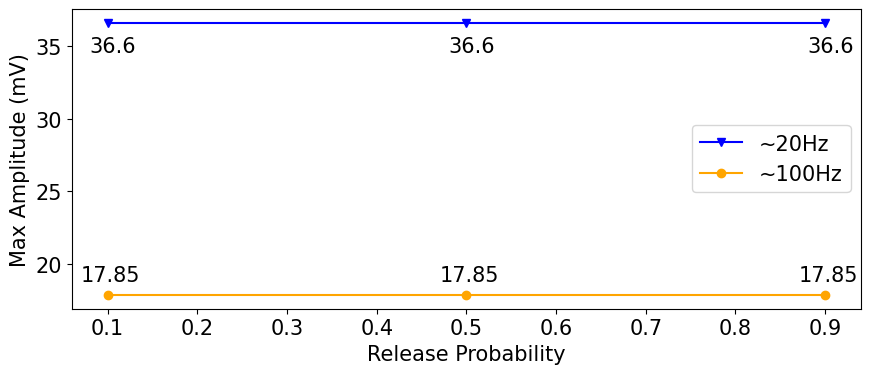

<Figure size 640x480 with 0 Axes>

In [8]:
# plot max amplitude for grc cells 

plt.rcParams.update({'font.size': 15})
fig, axes = plt.subplots(1, 1, figsize = (9, 4))

avg_20Hz_grc_vm = []
avg_100Hz_grc_vm = []


for model in slow_freq_model_list:
    avg_20Hz_grc_vm.append(np.mean(sim_dict[model]['data']['max_grc_v_array'][:]))
    
for model in fast_freq_model_list:
    avg_100Hz_grc_vm.append(np.mean(sim_dict[model]['data']['max_grc_v_array'][:]))
    
avg_20Hz_grc_vm = np.round(avg_20Hz_grc_vm, 2)
avg_100Hz_grc_vm =  np.round(avg_100Hz_grc_vm, 2)
    
for i in range(len(release_probs)):
    plt.annotate(str(avg_20Hz_grc_vm[i]), xy=(release_probs[i]-0.02, avg_20Hz_grc_vm[i]-2))
    
for i in range(len(release_probs)):
    plt.annotate(str(avg_100Hz_grc_vm[i]), xy=(release_probs[i]-0.03, avg_100Hz_grc_vm[i]+1))
    
plt.plot(release_probs, avg_20Hz_grc_vm, c='blue', ls='-', marker="v", label=("~20Hz"))
plt.plot(release_probs, avg_100Hz_grc_vm, c='orange', ls='-', marker="o", label=("~100Hz"))
# plt.title("Max Granule Cell Amplitude")
plt.xlabel("Release Probability")
plt.ylabel("Max Amplitude (mV)")
plt.legend(loc='best')
plt.tight_layout()
plt.show()
plt.savefig('max_grc_v_plots.svg', dpi = 300, facecolor='white', transparent=True)

([<matplotlib.axis.YTick at 0x7f6e5e7ff2b0>,
 [Text(0, 0.5, '100 Hz'), Text(0, 1.5, '20 Hz')])

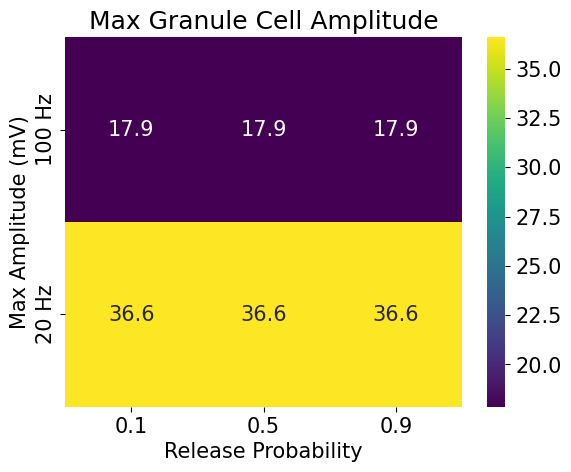

In [9]:
avg_grc_vm = [
    avg_100Hz_grc_vm,
    avg_20Hz_grc_vm
]
sns.heatmap(avg_grc_vm, annot=True, cmap="viridis", fmt=".1f")
plt.title("Max Granule Cell Amplitude")
plt.xlabel("Release Probability")
plt.ylabel("Max Amplitude (mV)")
plt.xticks(np.arange(len(avg_grc_vm[0]))+0.5, [0.1, 0.5, 0.9])
plt.yticks(np.arange(len(avg_grc_vm))+0.5, ["100 Hz", "20 Hz"])

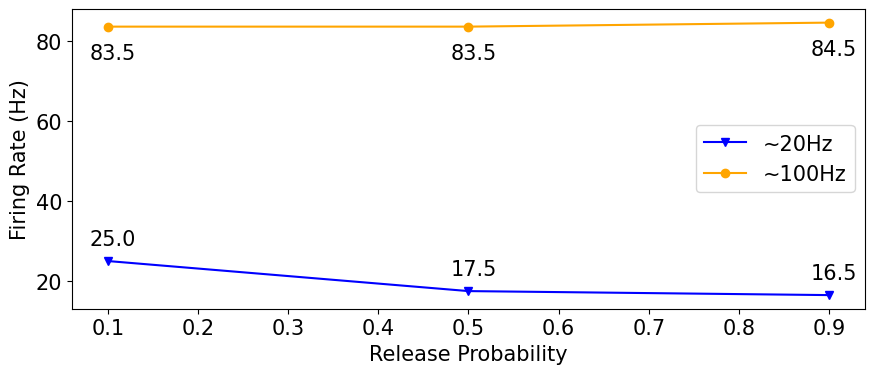

<Figure size 640x480 with 0 Axes>

In [10]:
# plot firing rate of golgi cells for each model

plt.rcParams.update({'font.size': 15})
fig, axes = plt.subplots(1, 1, figsize = (9, 4))

avg_20Hz_golgi_fr = []
avg_100Hz_golgi_fr = []

for model in slow_freq_model_list:
    avg_20Hz_golgi_fr.append(np.mean(sim_dict[model]['data']['golgi_fr_array']))
    
for model in fast_freq_model_list:
    avg_100Hz_golgi_fr.append(np.mean(sim_dict[model]['data']['golgi_fr_array']))

plt.plot(release_probs, avg_20Hz_golgi_fr, c='blue', ls='-', marker="v", label=("~20Hz"))
plt.plot(release_probs, avg_100Hz_golgi_fr, c='orange', ls='-', marker="o", label=("~100Hz"))

avg_20Hz_golgi_fr = np.round(avg_20Hz_golgi_fr, 2)
avg_100Hz_golgi_fr =  np.round(avg_100Hz_golgi_fr, 2)

for i in range(len(release_probs)):
    plt.annotate(str(avg_20Hz_golgi_fr[i]), xy=(release_probs[i]-0.02, avg_20Hz_golgi_fr[i] + 4))
    
for i in range(len(release_probs)):
    plt.annotate(str(avg_100Hz_golgi_fr[i]), xy=(release_probs[i]-0.02, avg_100Hz_golgi_fr[i] - 8))

# plt.title("Mean Golgi Cell Firing Rate")
plt.xlabel("Release Probability")
plt.ylabel("Firing Rate (Hz)")
plt.legend(loc='best')
plt.tight_layout()
plt.show()
plt.savefig('golgi_fr_plots.svg', dpi = 300, facecolor='white', transparent=True)

([<matplotlib.axis.YTick at 0x7f6e5c605f60>,
 [Text(0, 0.5, '100 Hz'), Text(0, 1.5, '20 Hz')])

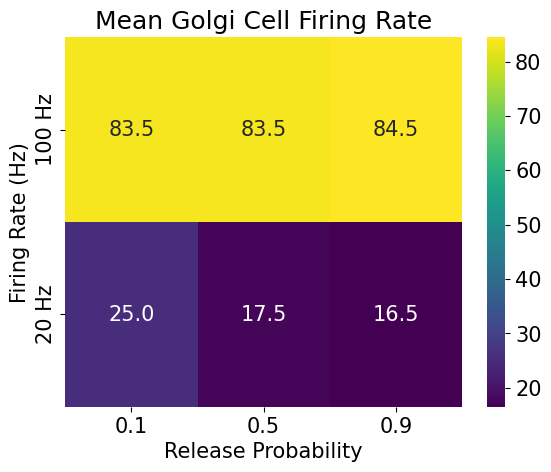

In [11]:
avg_golgi_fr = [
    avg_100Hz_golgi_fr,
    avg_20Hz_golgi_fr
]
sns.heatmap(avg_golgi_fr, annot=True, cmap="viridis", fmt=".1f")
plt.title("Mean Golgi Cell Firing Rate")
plt.xlabel("Release Probability")
plt.ylabel("Firing Rate (Hz)")
plt.xticks(np.arange(len(avg_golgi_fr[0]))+0.5, [0.1, 0.5, 0.9])
plt.yticks(np.arange(len(avg_golgi_fr))+0.5, ["100 Hz", "20 Hz"])

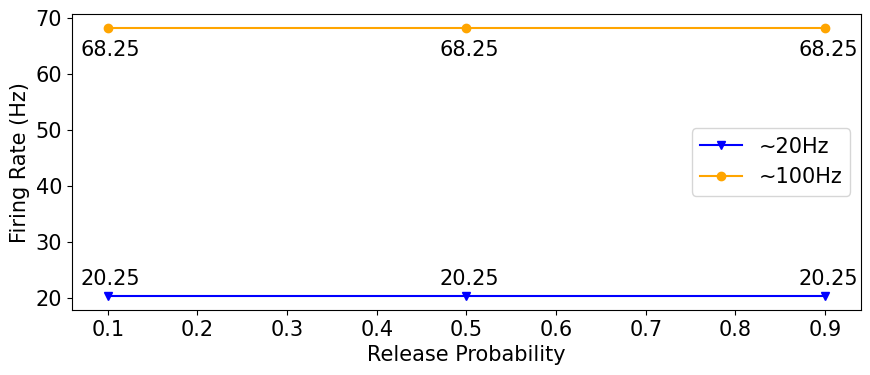

<Figure size 640x480 with 0 Axes>

In [12]:
# plot firing rate of granule cells for each model

plt.rcParams.update({'font.size': 15})
fig, axes = plt.subplots(1, 1, figsize = (9, 4))

avg_20Hz_grc_fr =[]
avg_100Hz_grc_fr =[]

for model in slow_freq_model_list:
    avg_20Hz_grc_fr.append(np.mean(sim_dict[model]['data']['grc_fr_array']))
    
for model in fast_freq_model_list:
    avg_100Hz_grc_fr.append(np.mean(sim_dict[model]['data']['grc_fr_array']))
    
avg_20Hz_grc_fr = np.round(avg_20Hz_grc_fr, 2)
avg_100Hz_grc_fr =  np.round(avg_100Hz_grc_fr, 2)

for i in range(len(release_probs)):
    plt.annotate(str(avg_20Hz_grc_fr[i]), xy=(release_probs[i]-0.03, avg_20Hz_grc_fr[i] + 2))
    
for i in range(len(release_probs)):
    plt.annotate(str(avg_100Hz_grc_fr[i]), xy=(release_probs[i]-0.03, avg_100Hz_grc_fr[i] - 5))

plt.plot(release_probs, avg_20Hz_grc_fr, c='blue', ls='-', marker="v", label=("~20Hz"))
plt.plot(release_probs, avg_100Hz_grc_fr, c='orange', ls='-', marker="o", label=("~100Hz"))
# plt.title("Mean Granule Cell Firing Rate")
plt.xlabel("Release Probability")
plt.ylabel("Firing Rate (Hz)")
plt.legend(loc='best')
plt.tight_layout()
plt.show()
plt.savefig('grc_fr_plots.svg', dpi = 300, facecolor='white', transparent=True)

([<matplotlib.axis.YTick at 0x7f6e5c5455d0>,
 [Text(0, 0.5, '100 Hz'), Text(0, 1.5, '20 Hz')])

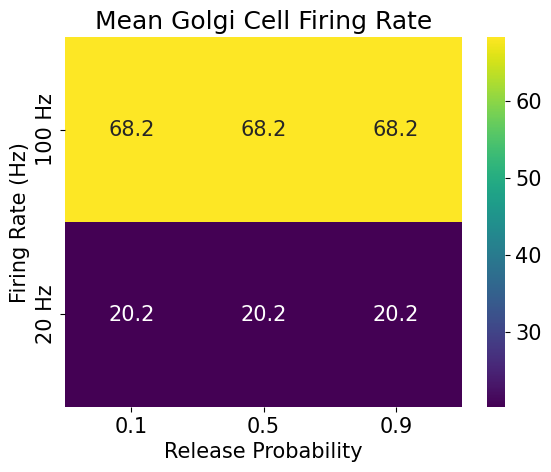

In [13]:
avg_grc_fr = [
    avg_100Hz_grc_fr,
    avg_20Hz_grc_fr
]


sns.heatmap(avg_grc_fr, annot=True, cmap="viridis", fmt=".1f")
plt.title("Mean Golgi Cell Firing Rate")
plt.xlabel("Release Probability")
plt.ylabel("Firing Rate (Hz)")
plt.xticks(np.arange(len(avg_grc_fr[0]))+0.5, [0.1, 0.5, 0.9])
plt.yticks(np.arange(len(avg_grc_fr))+0.5, ["100 Hz", "20 Hz"])

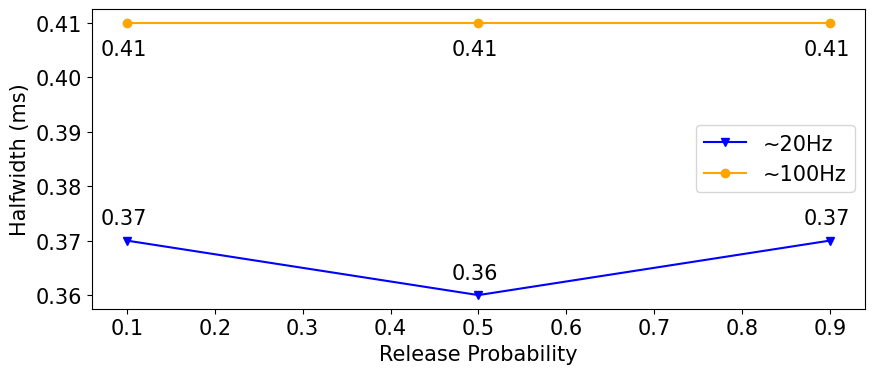

<Figure size 640x480 with 0 Axes>

In [31]:
# plot halfwidth of golgi cells for each model

plt.rcParams.update({'font.size': 15})
fig, axes = plt.subplots(1, 1, figsize = (9, 4))

avg_20Hz_golgi_halfwidth = []
avg_100Hz_golgi_halfwidth = []

for model in slow_freq_model_list:
    avg_20Hz_golgi_halfwidth.append(np.mean(sim_dict[model]['data']['golgi_halfwidth_array'][:]))
    
for model in fast_freq_model_list:
    avg_100Hz_golgi_halfwidth.append(np.mean(sim_dict[model]['data']['golgi_halfwidth_array'][:]))

avg_20Hz_golgi_halfwidth = np.round(avg_20Hz_golgi_halfwidth, 2)
avg_100Hz_golgi_halfwidth =  np.round(avg_100Hz_golgi_halfwidth, 2)

for i in range(len(release_probs)):
    plt.annotate(str(avg_20Hz_golgi_halfwidth[i]), xy=(release_probs[i]-0.03, avg_20Hz_golgi_halfwidth[i] + .003))
    
for i in range(len(release_probs)):
    plt.annotate(str(avg_100Hz_golgi_halfwidth[i]), xy=(release_probs[i]-0.03, avg_100Hz_golgi_halfwidth[i] - 0.006))
    
plt.plot(release_probs, avg_20Hz_golgi_halfwidth, c='blue', ls='-', marker="v", label=("~20Hz"))
plt.plot(release_probs, avg_100Hz_golgi_halfwidth, c='orange', ls='-', marker="o", label=("~100Hz"))
# plt.title("Mean Golgi Cell Halfwidth")
plt.xlabel("Release Probability")
plt.ylabel("Halfwidth (ms)")
plt.legend(loc='best')
plt.tight_layout()
plt.show()
plt.savefig('golgi_halfwidth_plot.svg', dpi = 300, facecolor='white', transparent=True)

([<matplotlib.axis.YTick at 0x7f6e5c4578e0>,
 [Text(0, 0.5, '100 Hz'), Text(0, 1.5, '20 Hz')])

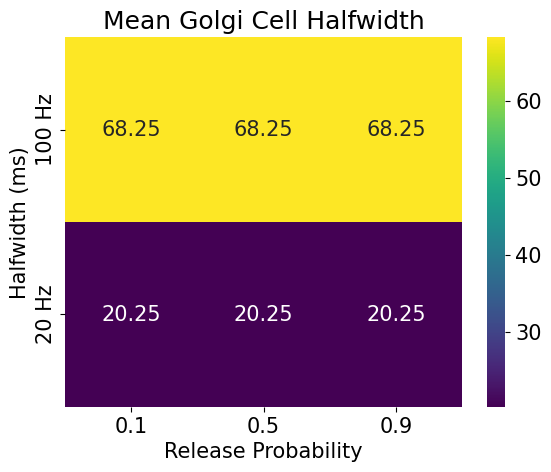

In [15]:
avg_golgi_halfwidth = [
    avg_100Hz_golgi_halfwidth,
    avg_20Hz_golgi_halfwidth
]
sns.heatmap(avg_golgi_halfwidth, annot=True, cmap="viridis", fmt=".2f")
plt.title("Mean Golgi Cell Halfwidth")
plt.xlabel("Release Probability")
plt.ylabel("Halfwidth (ms)")
plt.xticks(np.arange(len(avg_golgi_halfwidth[0]))+0.5, [0.1, 0.5, 0.9])
plt.yticks(np.arange(len(avg_golgi_halfwidth))+0.5, ["100 Hz", "20 Hz"])

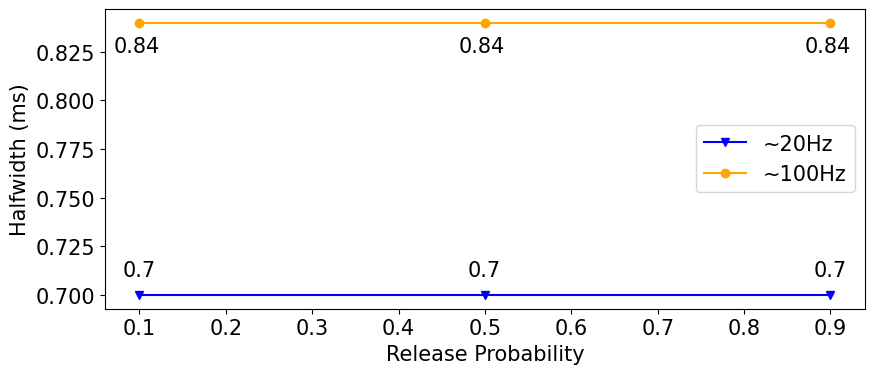

<Figure size 640x480 with 0 Axes>

In [39]:
# plot halfwidth of grc cells for each model

plt.rcParams.update({'font.size': 15})
fig, axes = plt.subplots(1, 1, figsize = (9, 4))

avg_20Hz_grc_halfwidth = []
avg_100Hz_grc_halfwidth = []

for model in slow_freq_model_list:
    avg_20Hz_grc_halfwidth.append(np.mean(sim_dict[model]['data']['grc_halfwidth_array'][:]))
    
for model in fast_freq_model_list:
    avg_100Hz_grc_halfwidth.append(np.mean(sim_dict[model]['data']['grc_halfwidth_array'][:]))
    
avg_20Hz_grc_halfwidth = np.round(avg_20Hz_grc_halfwidth, 2)
avg_100Hz_grc_halfwidth =  np.round(avg_100Hz_grc_halfwidth, 2)

for i in range(len(release_probs)):
    plt.annotate(str(avg_20Hz_grc_halfwidth[i]), xy=(release_probs[i]-0.02, avg_20Hz_grc_halfwidth[i] + 0.01))
    
for i in range(len(release_probs)):
    plt.annotate(str(avg_100Hz_grc_halfwidth[i]), xy=(release_probs[i]-0.03, avg_100Hz_grc_halfwidth[i] - 0.015))

plt.plot(release_probs, avg_20Hz_grc_halfwidth, c='blue', ls='-', marker="v", label=("~20Hz"))
plt.plot(release_probs, avg_100Hz_grc_halfwidth, c='orange', ls='-', marker="o", label=("~100Hz"))
# plt.title("Mean Granule Cell Halfwidth")
plt.xlabel("Release Probability")
plt.ylabel("Halfwidth (ms)")
plt.legend(loc='best')
plt.tight_layout()
plt.show()
plt.savefig('golgi_halfwidth_plot.svg', dpi = 300, facecolor='white', transparent=True)

([<matplotlib.axis.YTick at 0x7f6e5c454100>,
 [Text(0, 0.5, '100 Hz'), Text(0, 1.5, '20 Hz')])

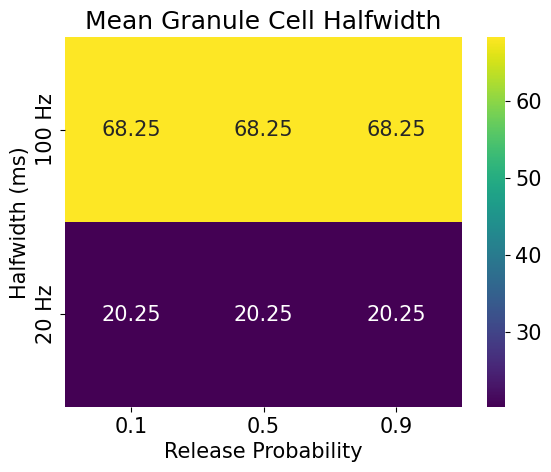

In [17]:
avg_grc_halfwidth = [
    avg_100Hz_grc_halfwidth,
    avg_20Hz_grc_halfwidth
]
sns.heatmap(avg_grc_halfwidth, annot=True, cmap="viridis", fmt=".2f")
plt.title("Mean Granule Cell Halfwidth")
plt.xlabel("Release Probability")
plt.ylabel("Halfwidth (ms)")
plt.xticks(np.arange(len(avg_grc_halfwidth[0]))+0.5, [0.1, 0.5, 0.9])
plt.yticks(np.arange(len(avg_grc_halfwidth))+0.5, ["100 Hz", "20 Hz"])

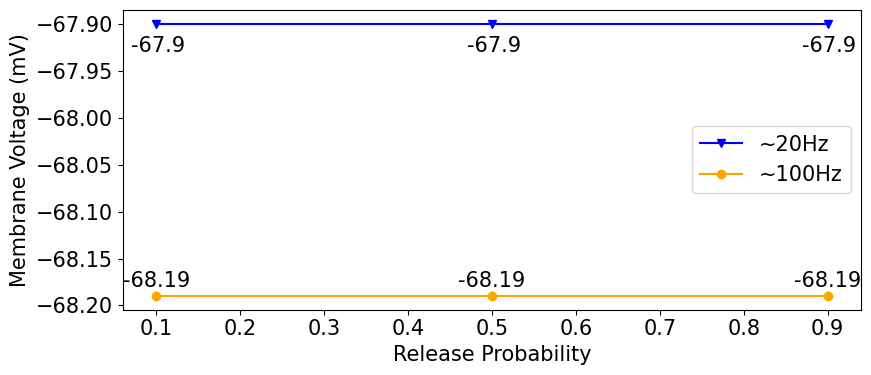

<Figure size 640x480 with 0 Axes>

In [18]:
# plot min voltage of grc cells for each model

plt.rcParams.update({'font.size': 15})
fig, axes = plt.subplots(1, 1, figsize = (9, 4))

min_20Hz_grc_v = []
min_100Hz_grc_v = []

for model in slow_freq_model_list:
    min_20Hz_grc_v.append(np.mean(sim_dict[model]['data']['min_grc_v_array'][:]))
    
for model in fast_freq_model_list:
    min_100Hz_grc_v.append(np.mean(sim_dict[model]['data']['min_grc_v_array'][:]))
    
        
min_20Hz_grc_v = np.round(min_20Hz_grc_v, 2)
min_100Hz_grc_v =  np.round(min_100Hz_grc_v, 2)

for i in range(len(release_probs)):
    plt.annotate(str(min_20Hz_grc_v[i]), xy=(release_probs[i]-0.03, min_20Hz_grc_v[i]-0.03))
    
for i in range(len(release_probs)):
    plt.annotate(str(min_100Hz_grc_v[i]), xy=(release_probs[i]-0.04, min_100Hz_grc_v[i]+0.01))

plt.plot(release_probs, min_20Hz_grc_v, c='blue', ls='-', marker="v", label=("~20Hz"))
plt.plot(release_probs, min_100Hz_grc_v, c='orange', ls='-', marker="o", label=("~100Hz"))
# plt.title("Min Granule Cell Voltage")
plt.xlabel("Release Probability")
plt.ylabel("Membrane Voltage (mV)")
plt.legend(loc='best')
plt.tight_layout()
plt.show()
plt.savefig('golgi_halfwidth_plot.svg', dpi = 300, facecolor='white', transparent=True)

In [19]:
min_20Hz_grc_v

array([-67.9, -67.9, -67.9])

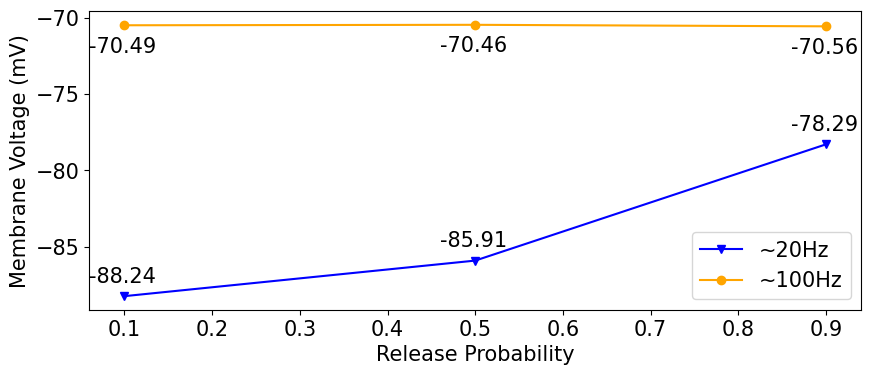

<Figure size 640x480 with 0 Axes>

In [51]:
# plot min voltage of golgi cells for each model

plt.rcParams.update({'font.size': 15})
fig, axes = plt.subplots(1, 1, figsize = (9, 4))

min_20Hz_golgi_v = []
min_100Hz_golgi_v = []

for model in slow_freq_model_list:
    min_20Hz_golgi_v.append(np.mean(sim_dict[model]['data']['min_golgi_v_array'][:]))
    
for model in fast_freq_model_list:
    min_100Hz_golgi_v.append(np.mean(sim_dict[model]['data']['min_golgi_v_array'][:]))
    
min_20Hz_golgi_v = np.round(min_20Hz_golgi_v, 2)
min_100Hz_golgi_v =  np.round(min_100Hz_golgi_v, 2)

for i in range(len(release_probs)):
    plt.annotate(str(min_20Hz_golgi_v[i]), xy=(release_probs[i]-0.04, min_20Hz_golgi_v[i] + 0.9))
    
for i in range(len(release_probs)):
    plt.annotate(str(min_100Hz_golgi_v[i]), xy=(release_probs[i]-0.04, min_100Hz_golgi_v[i] - 1.8))

plt.plot(release_probs, min_20Hz_golgi_v, c='blue', ls='-', marker="v", label=("~20Hz"))
plt.plot(release_probs, min_100Hz_golgi_v, c='orange', ls='-', marker="o", label=("~100Hz"))
# plt.title("Min Golgi Cell Voltage")
plt.xlabel("Release Probability")
plt.ylabel("Membrane Voltage (mV)")
plt.legend(loc='best')
plt.tight_layout()
plt.show()
plt.savefig('golgi_halfwidth_plot.svg', dpi = 300, facecolor='white', transparent=True)

In [21]:
# 

fvalue, pvalue = stats.f_oneway(min_20Hz_golgi_v, min_100Hz_golgi_v)
print(fvalue, pvalue)

20.617173174099655 0.010492208160703126


In [22]:
min_100Hz_golgi_v

array([-70.49, -70.46, -70.56])